In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
from numba import jit

import sys
sys.path.append('../shared')

from bartolozziSPEED import *

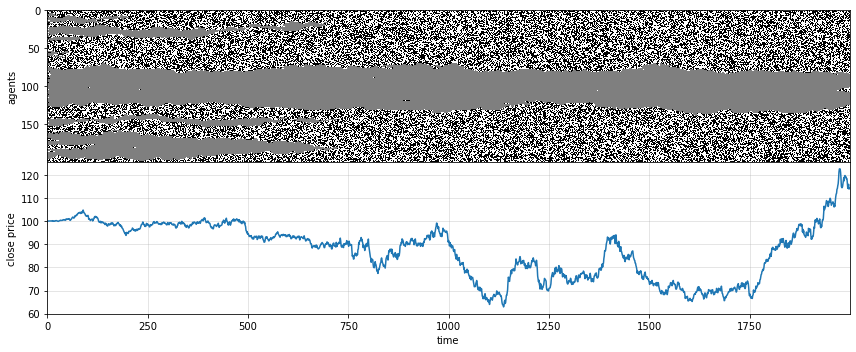

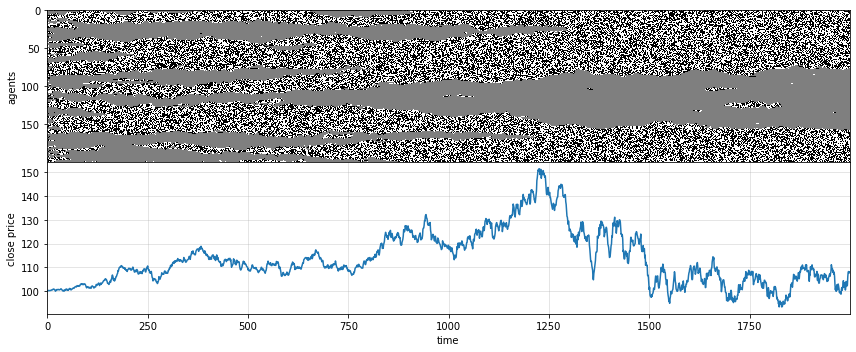

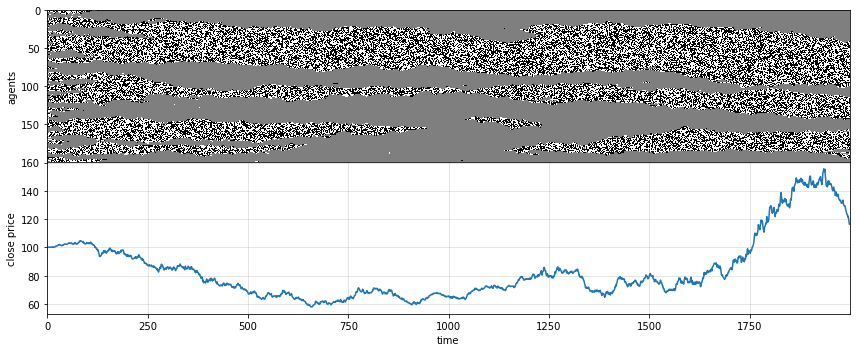

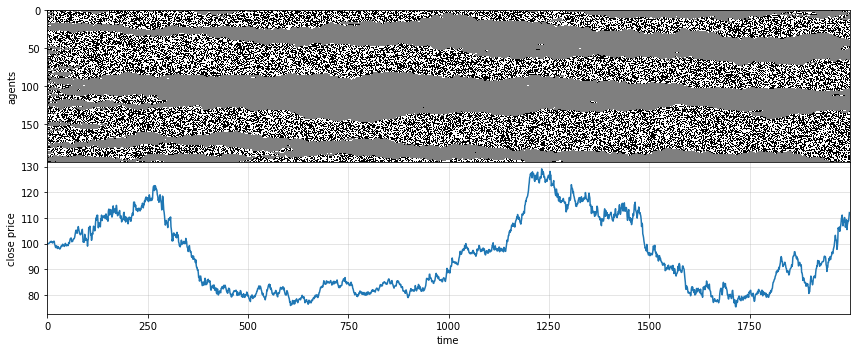

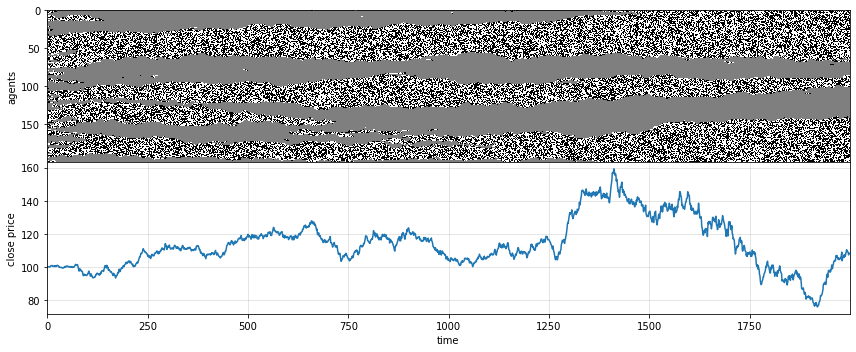

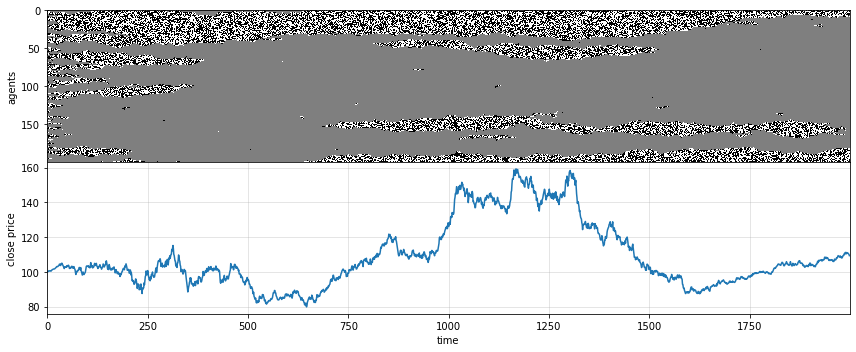

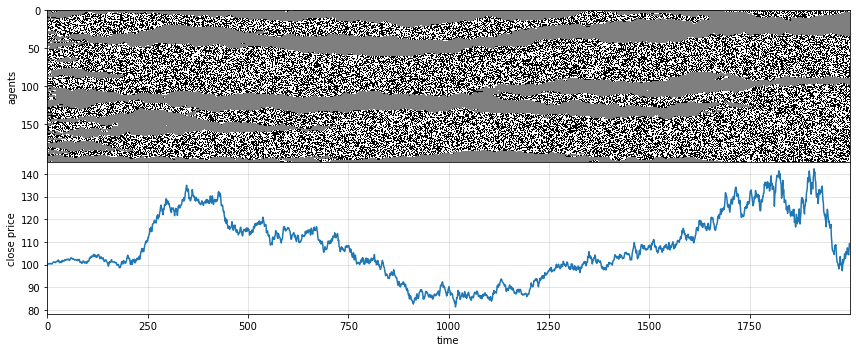

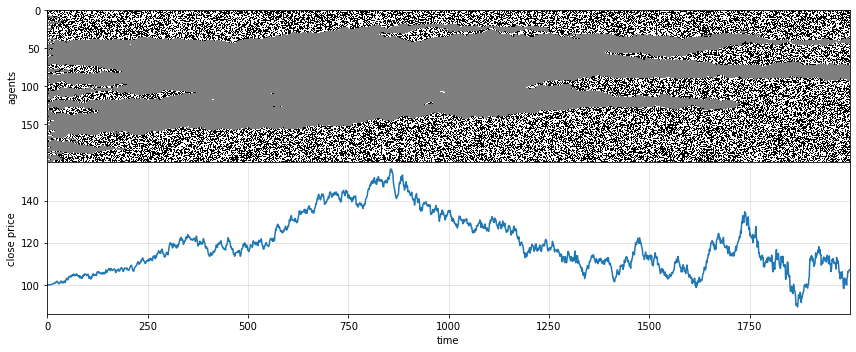

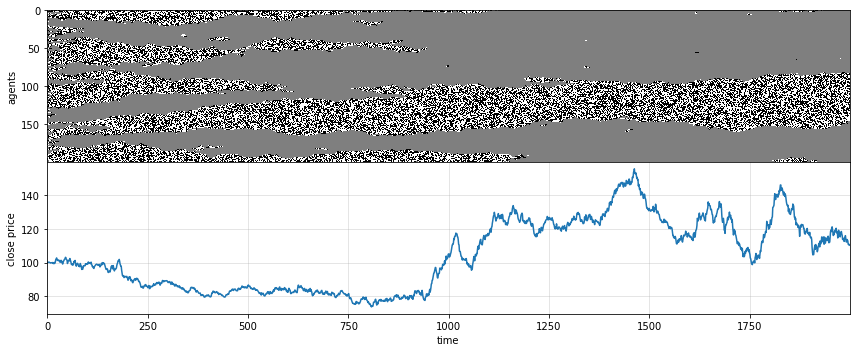

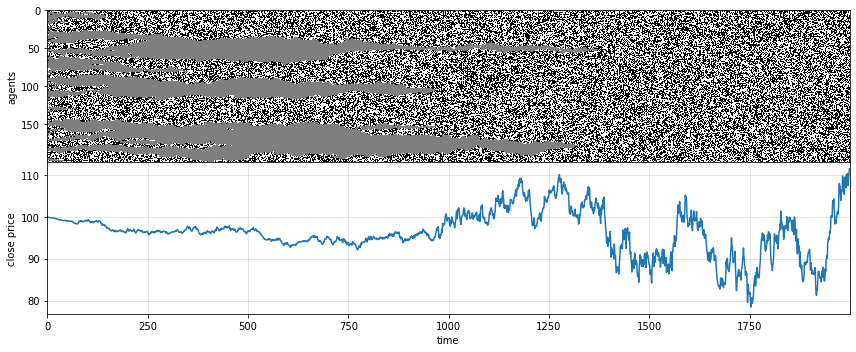

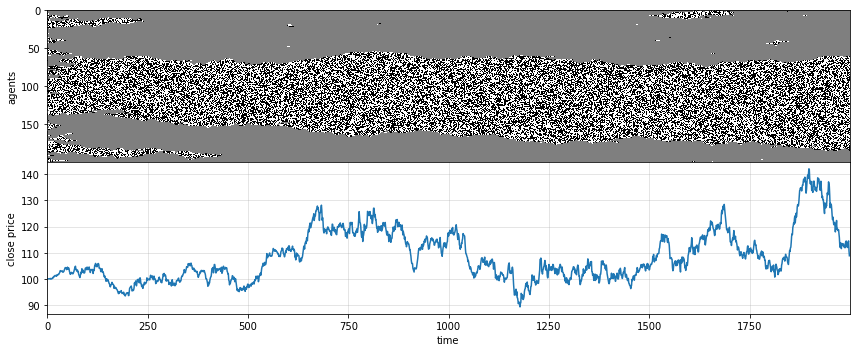

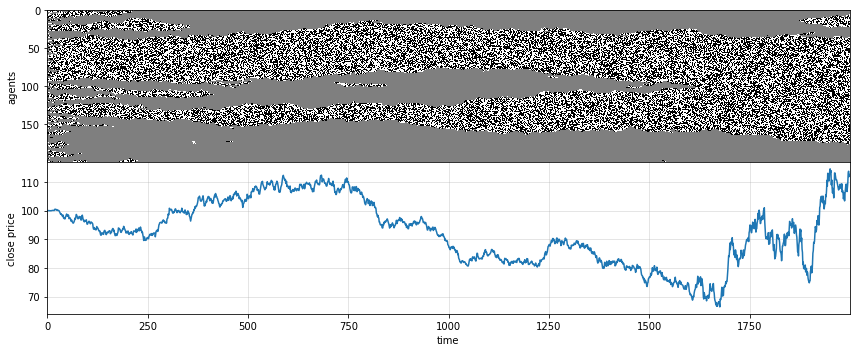

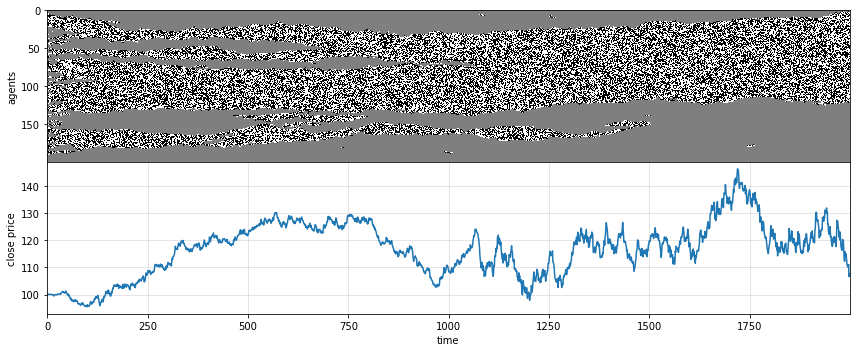

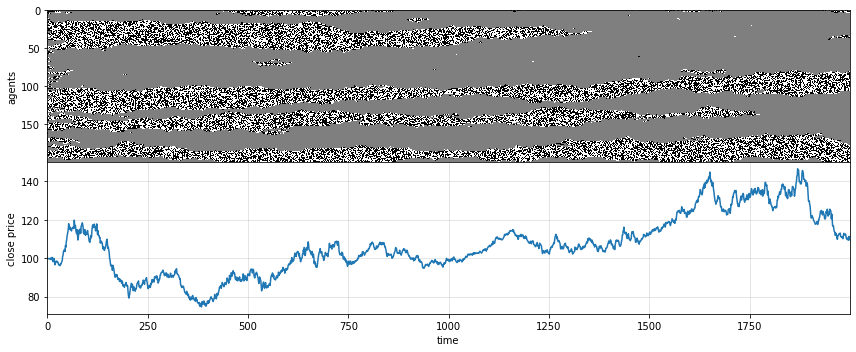

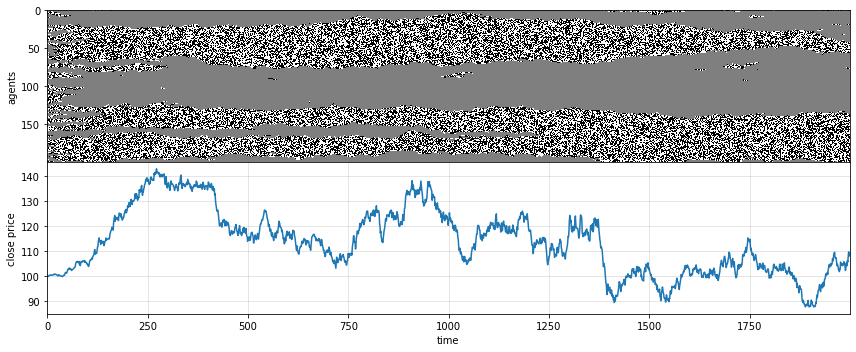

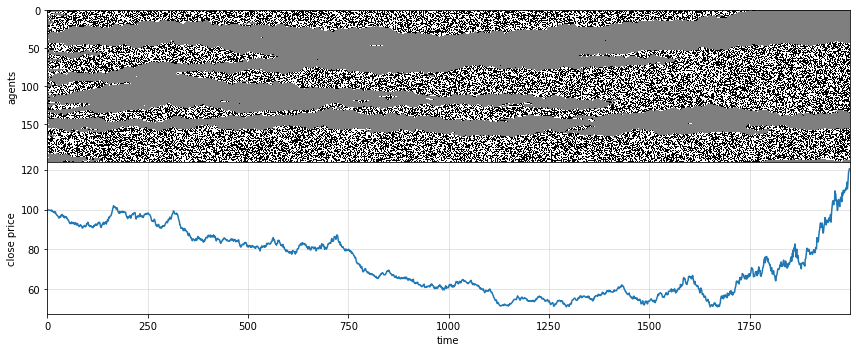

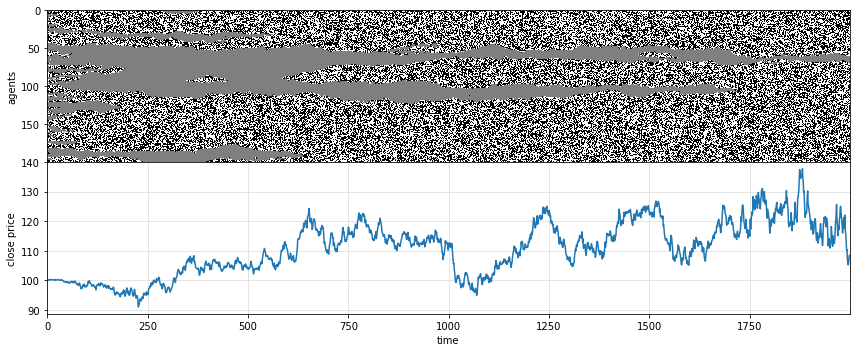

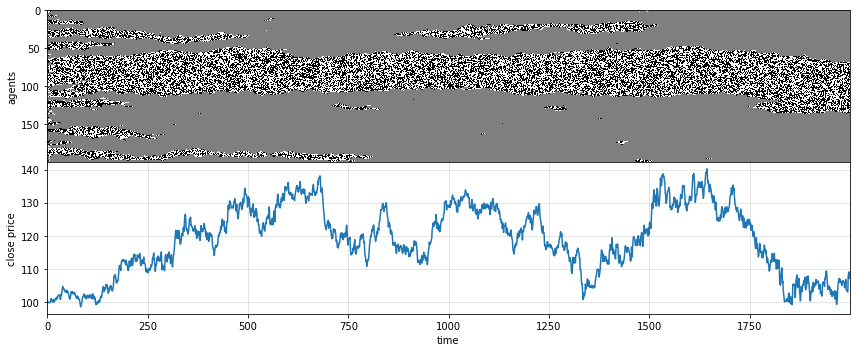

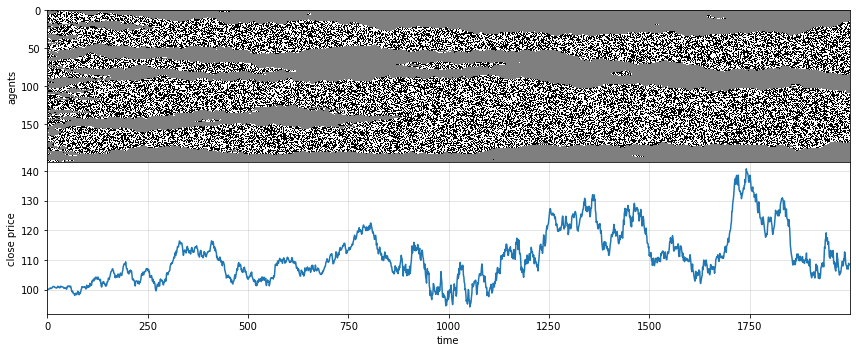

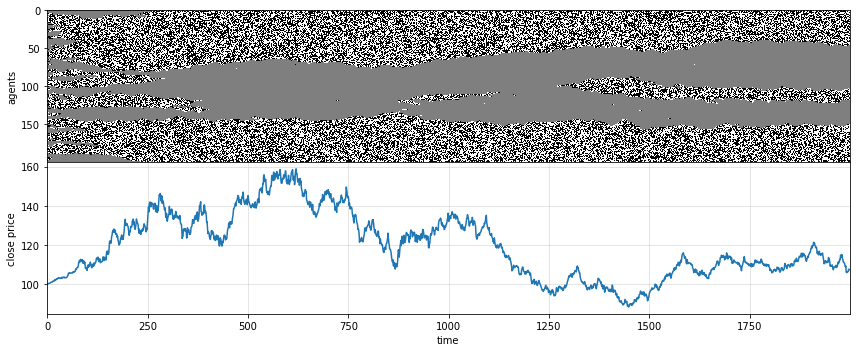

In [66]:
A_SPACE = np.linspace(0,10,20)

SIM = 1

RVAR_STANDARD = np.zeros((len(A_SPACE), SIM))
RVAR = np.zeros((len(A_SPACE), SIM))

for j, A_val in enumerate(A_SPACE):
    for l in range(SIM):

        A = A_val # interaction strength between agents

        # Default
        # pd = 0.1
        # pe = 0.0001
        # ph = 0.1 
        # pa = 0.5
        # N0 = 2000
        # N1 = 200
        # A = 2
        # a = 0.1
        # h = 0.1


        pd = 0.1  # probability that an active trader diffuses and becomes inactive
        pe = 0.0001 # probability that a nontrading enters the market
        ph = 0.1 # probability that an active trader can turn one of his inactive neighbors into an active one
        pa = 0.5 # active and inactive distribution 

        N0 = 2000 # timepoints
        N1 = 200  # granulization of the grid / agents

        a = 0.1 # randomness of A 
        h = 1000  # external field reflecting the effects of the environmnet


        G, RVAR_ARRAY = generate(pd, pe, ph, pa, N0, N1, A, a, h)
        RVAR[j, l]= np.sum(RVAR_ARRAY**2)
        
        x = RVAR_ARRAY
        fig, (ax1, ax2) = plt.subplots(
            ncols=1, nrows=2, figsize=(12,5), sharex=True, gridspec_kw = {'wspace':0, 'hspace':0}
        )
        ax1.imshow(G.T, cmap="binary", interpolation="None", aspect="auto")
        # plt.colorbar()

        r = (x - np.mean(x)) / np.std(x)
        s = 100
        S = np.zeros_like(x)
        S[0] = s
        for i in range(1,N0):
            # S[i] = S[i-1] + (S[i-1] * r[i])
            S[i] = S[i-1] + (S[i-1] * r[i]/100) + 0.01

        ax2.plot(S)
        ax2.grid(alpha=0.4)

        ax2.set_xlabel("time")
        # ax2.set_ylabel("standardised log returns")
        ax2.set_ylabel("close price")
        ax1.set_ylabel("agents")

        plt.tight_layout()
        plt.show()


RVAR_MEAN = np.mean(RVAR, axis=1)

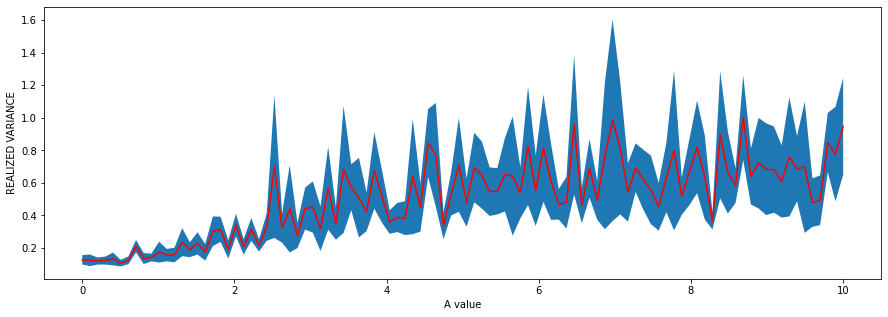

In [47]:
RVAR_STD = np.std(RVAR, axis=1)
RVAR_STD= RVAR_STD/np.max(RVAR_STD)

Y1 = RVAR_MEAN/np.max(RVAR_MEAN)+1.96*(RVAR_STD)/np.sqrt(SIM)
Y2 = RVAR_MEAN/np.max(RVAR_MEAN)-1.96*(RVAR_STD)/np.sqrt(SIM)

plt.figure(figsize=(15,5))
plt.plot(A_SPACE, RVAR_MEAN/np.max(RVAR_MEAN), color="r")
plt.fill_between(x=A_SPACE, y1 =Y1, y2=Y2)
plt.xlabel("A value")
plt.ylabel("REALIZED VARIANCE")
plt.show()

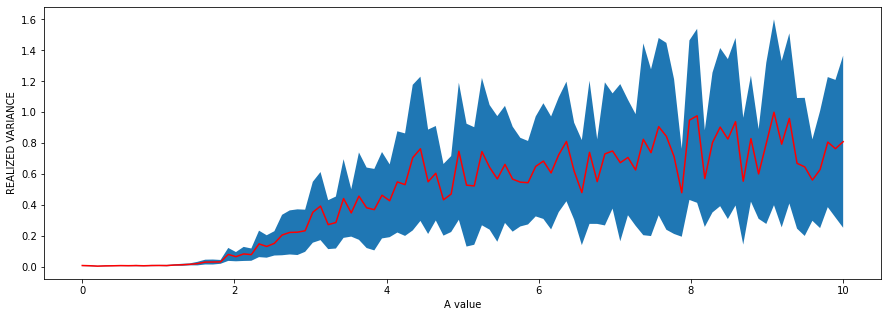

In [50]:
RVAR2 = np.load("CA_100sim_2000N0_Arange(0,10,100).npy")
RVAR_MEAN2 = np.mean(RVAR2, axis=1)
RVAR_STD2 = np.std(RVAR2, axis=1)
RVAR_STD2= RVAR_STD2/np.max(RVAR_STD2)

Y1 = RVAR_MEAN2/np.max(RVAR_MEAN2)+1.96*(RVAR_STD2)/np.sqrt(100)
Y2 = RVAR_MEAN2/np.max(RVAR_MEAN2)-1.96*(RVAR_STD2)/np.sqrt(100)

plt.figure(figsize=(15,5))
plt.plot(A_SPACE, RVAR_MEAN2/np.max(RVAR_MEAN2), color="r")
plt.fill_between(x=A_SPACE, y1 =Y1, y2=Y2)
plt.xlabel("A value")
plt.ylabel("REALIZED VARIANCE")
plt.show()

In [31]:
RVAR_STD/np.max(RVAR_STD)

array([0.00584158, 0.00571303, 0.00320149, 0.00475359, 0.00417657,
       0.00584396, 0.00538863, 0.00661943, 0.00578196, 0.00642858,
       0.00609171, 0.00706218, 0.00741085, 0.01042487, 0.01015188,
       0.01844671, 0.02486581, 0.02588914, 0.02000337, 0.06757933,
       0.04816633, 0.07328812, 0.06414542, 0.13790712, 0.11692119,
       0.12678924, 0.21085994, 0.22974711, 0.23818516, 0.21968952,
       0.31755251, 0.35496538, 0.25512716, 0.2709177 , 0.41021272,
       0.24710349, 0.45537897, 0.41953565, 0.4248095 , 0.45056887,
       0.379586  , 0.52787195, 0.53438624, 0.75921353, 0.7520063 ,
       0.5441365 , 0.49256193, 0.37358759, 0.39587307, 0.714683  ,
       0.64042273, 0.61286482, 0.76827041, 0.64980614, 0.65493378,
       0.61037828, 0.54755907, 0.46207664, 0.43516167, 0.52105354,
       0.60309771, 0.58886381, 0.59832863, 0.62348787, 0.505319  ,
       0.54770249, 0.74609431, 0.44077808, 0.74589048, 0.6005528 ,
       0.81958165, 0.60248676, 0.58210863, 1.        , 0.86949